In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from helpers import *
from data_processing import *
from pipeline import *
from cross_validation import find_best_parameter

In [8]:
DATA_FOLDER = '../data/'
DATA_ZIP = DATA_FOLDER + 'datasets.zip'

DATA_TRAIN_PATH = DATA_FOLDER + 'train.csv'
DATA_TEST_PATH = DATA_FOLDER + 'test.csv' 

y, tX, ids = load_csv_data(DATA_TRAIN_PATH)
y_test, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)
Y_train, X_train, IDS_train, Y_test, X_test, IDS_test = clean_by_cat(y, tX, ids, y_test, tX_test, ids_test)

In [19]:
CATEGORIES_NBR = 4
def fine_tune(models):
    for model_name, model in models.items() :
        for param_name, param_values in model.items() :
            print("Fitting {} for {}".format(param_name, model_name))
            for i in range(CATEGORIES_NBR):
                #todo, si on a déjà optimisé un paramètre pour un modèle, utiliser celui ci au lieu de celui par défaut dans la fonction
                best_iter, best_loss = find_best_parameter(Y_train[i], X_train[i], model_name, param_name, param_values, logspace=True, gamma=0.15, poly_exp=3, lambda_=0.0003, max_iters=1000)
                print("Best {} for {} on category {} is {} with test accuracy averaging at {}".format(param_name, model_name, i+1, best_iter, best_loss))

In [20]:
#Data structure example
models = {
        'least_squares' : {
            'poly_exp' : np.arange(2),
        },
        'ridge_regression' : {
            'poly_exp' : np.arange(2),
            'lambda_' : np.logspace(-4, 1, 3)
        },
        'logistic_regression' : {
            #'poly_exp' : np.arange(6),
            #'max_iters' : (np.arange(5)+1)*500,
            #'gamma' : np.logspace(-1.5, -0.5, 8)
        }
    }
#fine_tune(models)

# Least Squares

In [21]:
least_square_model = {
    'least_squares' : {
        'poly_exp' : np.arange(15),
    },
}
fine_tune(least_square_model)

Fitting poly_exp for least_squares


KeyboardInterrupt: 

# Ridge Regression

Testing lambda values with polynomial expansion degree 5 (arbitrary)

In [ ]:
ridge_regression_model = {
    'ridge_regression' : {
        'lambda_' : np.logspace(-4, 3, 30),
        'poly_exp' : np.arange(20)
    },
}

fine_tune(ridge_regression_model)

# Logistic Regression

Keeping lambda low but above zero, we look for best degree again

# Logistic Regression

Fitting gamma for logistic_regression


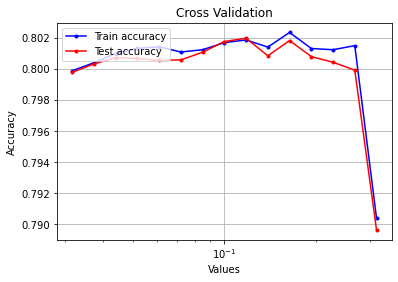

Best gamma for logistic_regression on category 1 is 0.11787686347935872 with test accuracy averaging at 0.8019600024538371


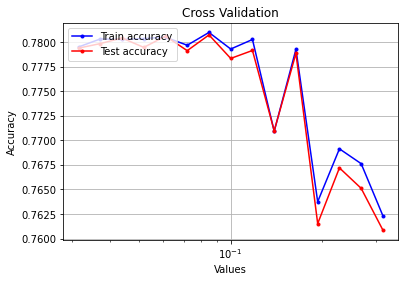

Best gamma for logistic_regression on category 2 is 0.08483428982440722 with test accuracy averaging at 0.7807208069503755


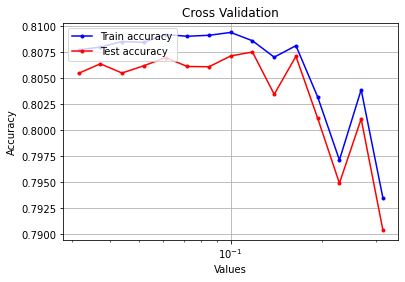

Best gamma for logistic_regression on category 3 is 0.11787686347935872 with test accuracy averaging at 0.807498741821842


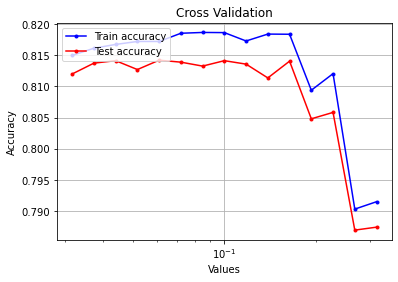

Best gamma for logistic_regression on category 4 is 0.061054022965853265 with test accuracy averaging at 0.8141977258370183
Fitting poly_exp for logistic_regression


C:\Users\jbenh\Documents\GitHub\CS-433-machine-learning\project1\scripts\costs.py:52: RuntimeWarning: overflow encountered in exp
  inv_exp = np.exp(-t)
C:\Users\jbenh\Documents\GitHub\CS-433-machine-learning\project1\scripts\costs.py:22: RuntimeWarning: overflow encountered in exp
  sum_logs = np.log(np.exp(prediction) + 1).sum()


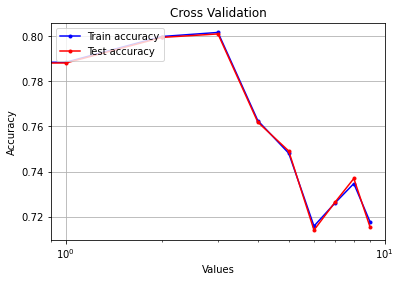

Best poly_exp for logistic_regression on category 1 is 3 with test accuracy averaging at 0.8010398135083737


C:\Users\jbenh\Documents\GitHub\CS-433-machine-learning\project1\scripts\costs.py:52: RuntimeWarning: overflow encountered in exp
  inv_exp = np.exp(-t)
C:\Users\jbenh\Documents\GitHub\CS-433-machine-learning\project1\scripts\costs.py:22: RuntimeWarning: overflow encountered in exp
  sum_logs = np.log(np.exp(prediction) + 1).sum()


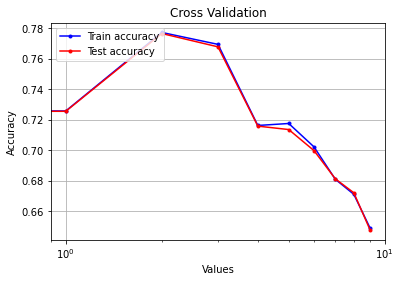

Best poly_exp for logistic_regression on category 2 is 2 with test accuracy averaging at 0.7764136356943012


C:\Users\jbenh\Documents\GitHub\CS-433-machine-learning\project1\scripts\costs.py:22: RuntimeWarning: overflow encountered in exp
  sum_logs = np.log(np.exp(prediction) + 1).sum()
C:\Users\jbenh\Documents\GitHub\CS-433-machine-learning\project1\scripts\costs.py:52: RuntimeWarning: overflow encountered in exp
  inv_exp = np.exp(-t)


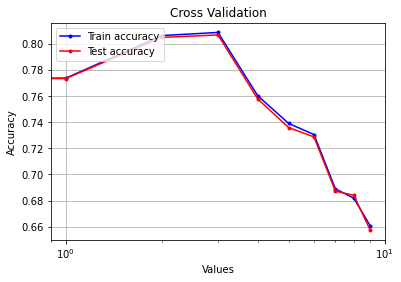

Best poly_exp for logistic_regression on category 3 is 3 with test accuracy averaging at 0.8065551082033217


C:\Users\jbenh\Documents\GitHub\CS-433-machine-learning\project1\scripts\costs.py:22: RuntimeWarning: overflow encountered in exp
  sum_logs = np.log(np.exp(prediction) + 1).sum()
C:\Users\jbenh\Documents\GitHub\CS-433-machine-learning\project1\scripts\costs.py:52: RuntimeWarning: overflow encountered in exp
  inv_exp = np.exp(-t)


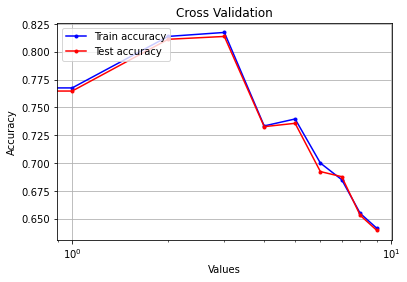

Best poly_exp for logistic_regression on category 4 is 3 with test accuracy averaging at 0.8137239418825016


In [22]:
logistic_regression_model = {
    'logistic_regression' : {
        'gamma' : np.logspace(-1.5, -0.5, 15),
        'poly_exp' : np.arange(10)
    },
}

fine_tune(logistic_regression_model)

In [ ]:
#best values
{
    'logistic_regression' : {
        'Best gamma for logistic_regression on category 1 is 0.11787686347935872 with test accuracy averaging at 0.8019600024538371',
        'Best gamma for logistic_regression on category 2 is 0.08483428982440722 with test accuracy averaging at 0.7807208069503755',
        'Best gamma for logistic_regression on category 3 is 0.11787686347935872 with test accuracy averaging at 0.807498741821842',
        'Best gamma for logistic_regression on category 4 is 0.061054022965853265 with test accuracy averaging at 0.8141977258370183',
        'Best poly_exp for logistic_regression on category 1 is 3 with test accuracy averaging at 0.8010398135083737',
        'Best poly_exp for logistic_regression on category 2 is 2 with test accuracy averaging at 0.7764136356943012',
        'Best poly_exp for logistic_regression on category 3 is 3 with test accuracy averaging at 0.8065551082033217',
        'Best poly_exp for logistic_regression on category 4 is 3 with test accuracy averaging at 0.8137239418825016'
    }
}

C:\Users\Moi\Desktop\Desktop\EPFL\Master\MA1\CS-433 - Machine Learning\CS-433-machine-learning\project1\scripts\logistic_regression.py:7: RuntimeWarning: overflow encountered in exp
  inv_exp = np.exp(-t)
C:\Users\Moi\Desktop\Desktop\EPFL\Master\MA1\CS-433 - Machine Learning\CS-433-machine-learning\project1\scripts\costs.py:28: RuntimeWarning: overflow encountered in exp
  sum_logs = np.log(np.exp(prediction) + 1).sum()


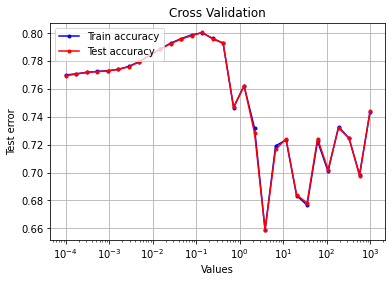

Best gamma for logistic_regression on category 1 is 0.1373823795883264 with test accuracy averaging at 0.8003189988344273


C:\Users\Moi\Desktop\Desktop\EPFL\Master\MA1\CS-433 - Machine Learning\CS-433-machine-learning\project1\scripts\costs.py:28: RuntimeWarning: overflow encountered in exp
  sum_logs = np.log(np.exp(prediction) + 1).sum()
C:\Users\Moi\Desktop\Desktop\EPFL\Master\MA1\CS-433 - Machine Learning\CS-433-machine-learning\project1\scripts\logistic_regression.py:7: RuntimeWarning: overflow encountered in exp
  inv_exp = np.exp(-t)


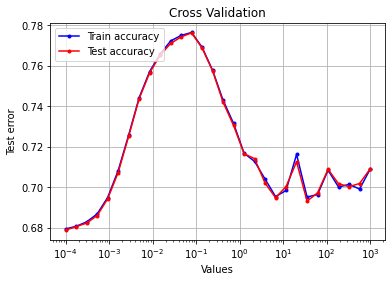

Best gamma for logistic_regression on category 2 is 0.07880462815669913 with test accuracy averaging at 0.7762479752613753


C:\Users\Moi\Desktop\Desktop\EPFL\Master\MA1\CS-433 - Machine Learning\CS-433-machine-learning\project1\scripts\costs.py:28: RuntimeWarning: overflow encountered in exp
  sum_logs = np.log(np.exp(prediction) + 1).sum()
C:\Users\Moi\Desktop\Desktop\EPFL\Master\MA1\CS-433 - Machine Learning\CS-433-machine-learning\project1\scripts\logistic_regression.py:7: RuntimeWarning: overflow encountered in exp
  inv_exp = np.exp(-t)


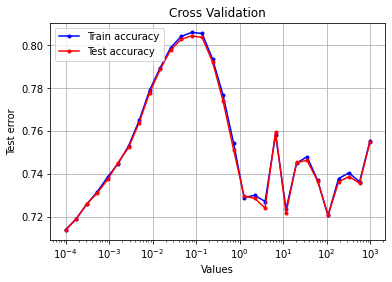

Best gamma for logistic_regression on category 3 is 0.07880462815669913 with test accuracy averaging at 0.8042589330649221


C:\Users\Moi\Desktop\Desktop\EPFL\Master\MA1\CS-433 - Machine Learning\CS-433-machine-learning\project1\scripts\logistic_regression.py:7: RuntimeWarning: overflow encountered in exp
  inv_exp = np.exp(-t)
C:\Users\Moi\Desktop\Desktop\EPFL\Master\MA1\CS-433 - Machine Learning\CS-433-machine-learning\project1\scripts\costs.py:28: RuntimeWarning: overflow encountered in exp
  sum_logs = np.log(np.exp(prediction) + 1).sum()


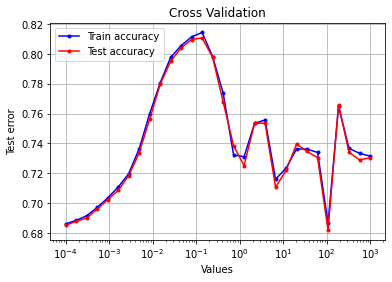

Best gamma for logistic_regression on category 4 is 0.1373823795883264 with test accuracy averaging at 0.8107233101705622


In [14]:
values = np.logspace(-4, 3, 30)
model_name = 'logistic_regression'
parameter_name = 'gamma'

for i in range(4):
    best_value, best_acc = find_best_parameter(Y_train[i], X_train[i], model_name, parameter_name, values, poly_exp=3, max_iters=300)
    print("Best {} for {} on category {} is {} with test accuracy averaging at {}".format(parameter_name, model_name, i+1, best_value, best_acc))

Adjusting max_iters

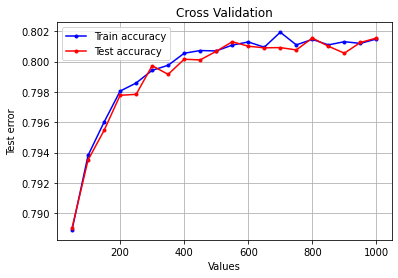

Best max_iters for logistic_regression on category 1 is 1000 with test accuracy averaging at 0.8015459174283788


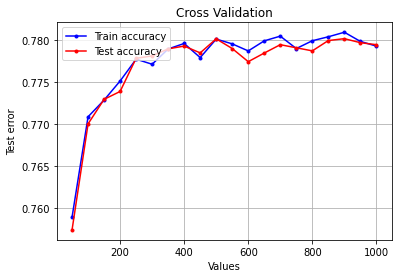

Best max_iters for logistic_regression on category 2 is 900 with test accuracy averaging at 0.7801870122220587


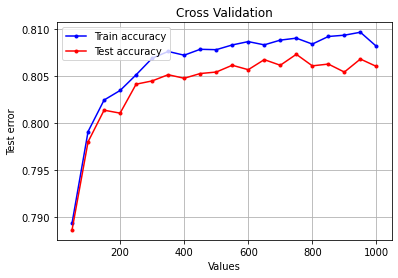

Best max_iters for logistic_regression on category 3 is 750 with test accuracy averaging at 0.8073100150981378


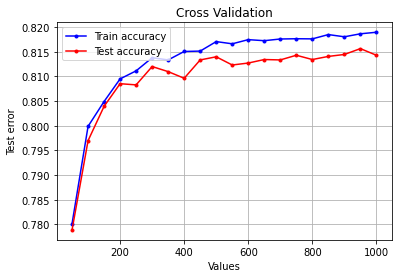

Best max_iters for logistic_regression on category 4 is 950 with test accuracy averaging at 0.8156190777005685


In [16]:
values = (np.arange(20)+1)*50
model_name = 'logistic_regression'
parameter_name = 'max_iters'

for i in range(4):
    best_value, best_acc = find_best_parameter(Y_train[i], X_train[i], model_name, parameter_name, values, logspace=False, gamma=0.1, poly_exp=3)
    print("Best {} for {} on category {} is {} with test accuracy averaging at {}".format(parameter_name, model_name, i+1, best_value, best_acc))